In [154]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [155]:
#Create a Model Classs that inherits nn.Module

class Model(nn.Module):
    # Input layer (4 features of flower) --> 
    # Hidden Layer 1(numb. of neurons) --> 
    # H2 (n) --> 
    # Output (3 classes of flowers)

    def __init__(self, in_features=4, h1=8, h2=9, out_features =3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2, out_features)

    #moving output to next layer 
    def forward(self, x):
        x = F.relu(self.fc1(x)) #if output < 0 : skip
        x = F.relu(self.fc2(x)) 
        x = self.out(x)

        return x        

       

In [156]:
#same randomness as in tutorial

torch.manual_seed(41)

#Create an instance of model

model = Model()

In [157]:
#Load data

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

# load data

In [159]:
print(my_df.to_string()) 
print(pd.options.display.max_rows) 
#dataframe

     sepal_length  sepal_width  petal_length  petal_width     species
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
5             5.4          3.9           1.7          0.4      setosa
6             4.6          3.4           1.4          0.3      setosa
7             5.0          3.4           1.5          0.2      setosa
8             4.4          2.9           1.4          0.2      setosa
9             4.9          3.1           1.5          0.1      setosa
10            5.4          3.7           1.5          0.2      setosa
11            4.8          3.4           1.6          0.2      setosa
12            4.8          3.0           1.4          0.1      setosa
13            4.3   

In [160]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df


C:\Users\banui\AppData\Local\Temp\ipykernel_25772\1578158659.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [161]:
# Train Rest Slit!

X = my_df.drop('species', axis=1)
y = my_df['species']
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [162]:
#convert to arrays

X = X.values
y = y.values

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [165]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [166]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [167]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.5857062935829163
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768797636032104
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151692062616348
Epoch: 80 and loss: 0.0860118642449379
Epoch: 90 and loss: 0.06520850211381912


Text(0.5, 0, 'Epoch')

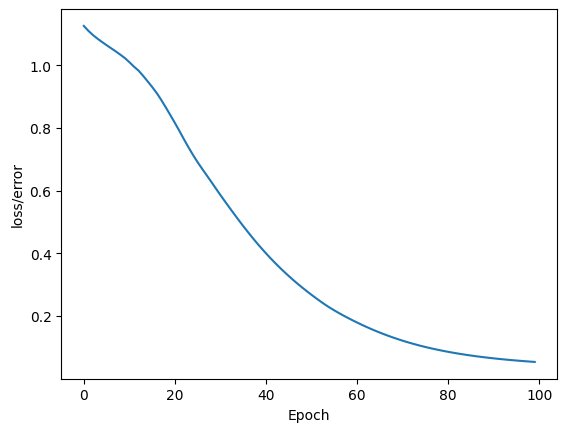

In [168]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [169]:
#Evaluate Model on Test Data Set

with torch.no_grad(): #turn of back propogation 
    y_eval = model.forward(X_test) #X_test are features from test set, y_eval : prediction
    loss = criterion(y_eval, y_test) #find the loss
    
     

In [170]:
loss

tensor(0.1315)

In [177]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        #Will tell us what type of flower class our netork think it is
        print(f'{i+1}.){str( y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')


#Correct or not

        if y_val.argmax().item() == y_test[i]:
            correct += 1


print(f'we got {correct} correct')



1.)tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.)tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.)tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.)tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.)tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.)tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.)tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.)tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.)tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.)tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.)tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.)tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.)tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.)tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.)tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.)tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.)tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.)tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.)tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.)tensor([ 3.4527, -1.2514, -2.3660]) 	 0 	 0
21.)tensor([-2.6189,  4.5619,  0.8574]) 	 1 	 1
2